****Random Sample Imputation****
 
 AIM : Random Sample imputation consists of taking random observation from dataset and we use this observation to replace nan values

****When should it be used :**** 
    It assumes that data are Missing Completely at Random.

In [1]:
import pandas as pd
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [5]:
median=df.Age.median()

In [6]:
impute_nan(df,'Age',median)

In [7]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

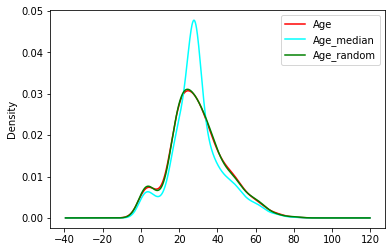

In [12]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='red')
df['Age_median'].plot(kind='kde',ax=ax,color='cyan')
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [11]:
#USING  RANDOM SAMPLE IMPUTATION THE GRAPH IS SAME. Using mean / median imputation there was distortion.

In [13]:
# ##ADVANTAGES:
# 1. Easy to implement 
# 2. There is no distortion in variance

# ##DISADVANTAGES
# 1. In every situation Randomness don't work

****Capturing Nan values with a new feature****

It works well if data are not missing completely at Random

In [15]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [18]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [19]:
df.Age.median()

28.0

In [20]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [22]:
df.head(40)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [23]:
# ##ADVANTAGES 
# 1. Easy to implement
# 2. Captures the importance of missing values.

# #DISADVANTAGES 
# 1. CREATING ADDITIONAL FEATURES (LEADS TO curse of Dimensionality)

***END OF DISTRIBUTION IMPUTATION***

In [25]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


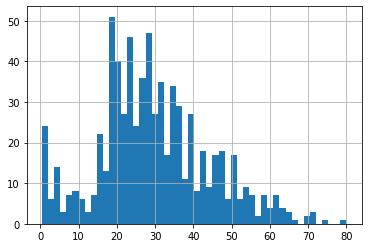

In [26]:
df.Age.hist(bins=50)

In [27]:
#We'll take the far - end of this distribution

In [28]:
df['Age'].mean()

29.69911764705882

In [35]:
extreme=df['Age'].mean()+3*df.Age.std() #WE ARE GOING TO TAKE THIS VALUE

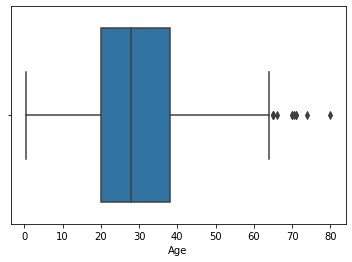

In [36]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [37]:
def impute_nan(df,variable,median,extreme):
    df[variable+"end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [38]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [39]:
df.head()

,Survived,Age,Fare,Ageend_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


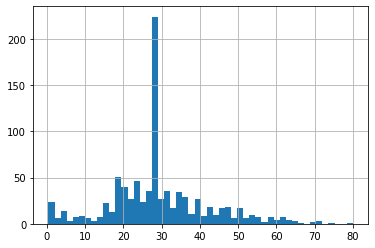

In [40]:
df['Age'].hist(bins=50)

In [41]:
#LARGE DISTORTION HERE

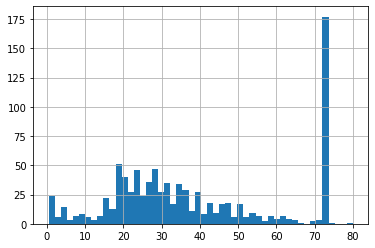

In [42]:
df['Ageend_distribution'].hist(bins=50)

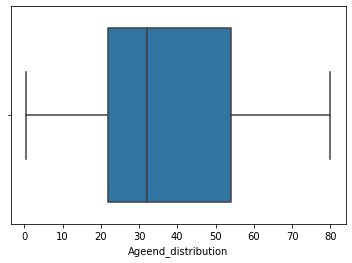

In [43]:
sns.boxplot('Ageend_distribution',data=df)

In [44]:
#GIVES PROPER DISTN OF AGE

In [45]:
#OUTLIERS HAVE BEEN CAPTURED USING THIS TECHNIQUE

In [ ]:
#ADVANTAGES
1. Easy to implement
2. Captures importance of missingness if there is one


#DISADVANTAGES
1. Distorts the original distn of variable
2. if missingness is not imp , it may ask predictive power of original var by distorting its distn
3. if number of NA is big , it will mask true outliers in distn
